Vogliamo visualizzare su un istogramma il numero di volte che un dado casca su ciascuna faccia.


In [ ]:
# Da eseguire solo se necessara istallazione della libreria
# !pip install matplotlib
# !pip install numpy
!pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import collections

In [2]:
# Tiriamo un dado 600 volte e salviamo i risultati in una lista

tiri = [random.randrange(1,7) for j in range(60000)]

In [3]:
print(len(tiri))

60000


In [ ]:
%%time

collections.Counter(tiri)

In [4]:
%%time
# piu' efficiente e veloce se usiamo numpy
valori, frequenza = np.unique(tiri, return_counts=True)

Wall time: 4.95 ms


In [ ]:
valori

In [ ]:
frequenza

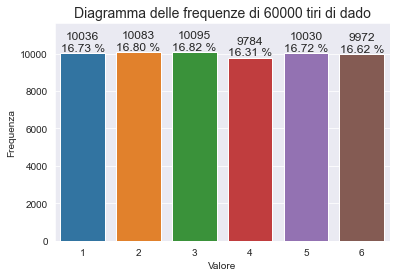

In [5]:
# imposto lo stile con sfondo grgietto
sns.set_style("darkgrid")

# scrivo la stringa che contiene il titolo
title = f"Diagramma delle frequenze di {len(tiri)} tiri di dado"
# creo l'oggetto axes, il digramma vero e proprio
axes = sns.barplot(x=valori, y=frequenza)

# metto su axes il titolo
axes.set_title(title, fontsize = 14)

# metto le etichette sull'asse x e sull'asse y
axes.set(xlabel = "Valore", ylabel = "Frequenza" )

# alzo il limite massimo sull'asse y
axes.set_ylim(top = max(frequenza) * 1.15)



# per ciascun rettangolo nel diagramma:
for bar, frequenza_bar in  zip(axes.patches, frequenza):
    # recupera la posizione del rettangolo
    x_text = bar.get_x() + bar.get_width()/2 
    # bar.get_x( e' il punto in basso a sinistra del diagramma)
    # a cui sommo mezza larghezza della barra
    y_text = bar.get_y() + bar.get_height()
    text = f"{bar.get_height():.0f}\n{100*bar.get_height()/len(tiri):.2f} %"
    axes.text(x_text, y_text, text,
             ha = "center", # allinea il testo al centro orizzontalmente
             va = "bottom", # allinea il testo in basso verticalmente
             fontsize = 12  # imposto le dimensioni del carattere del text
             )

plt.show()

In [7]:
# Salvo con un magic command di IPython (Jupyter) le celle dalla 1 alla 5 nel file diagramma.py
%save diagramma.py 1 5

The following commands were written to file `diagramma.py`:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import collections
# imposto lo stile con sfondo grgietto
sns.set_style("darkgrid")

# scrivo la stringa che contiene il titolo
title = f"Diagramma delle frequenze di {len(tiri)} tiri di dado"
# creo l'oggetto axes, il digramma vero e proprio
axes = sns.barplot(x=valori, y=frequenza)

# metto su axes il titolo
axes.set_title(title, fontsize = 14)

# metto le etichette sull'asse x e sull'asse y
axes.set(xlabel = "Valore", ylabel = "Frequenza" )

# alzo il limite massimo sull'asse y
axes.set_ylim(top = max(frequenza) * 1.15)



# per ciascun rettangolo nel diagramma:
for bar, frequenza_bar in  zip(axes.patches, frequenza):
    # recupera la posizione del rettangolo
    x_text = bar.get_x() + bar.get_width()/2 
    # bar.get_x( e' il punto in basso a sinistra del diagramma)
    # a cui sommo mezza larghezza della barra
    y_text = bar.get_y() 